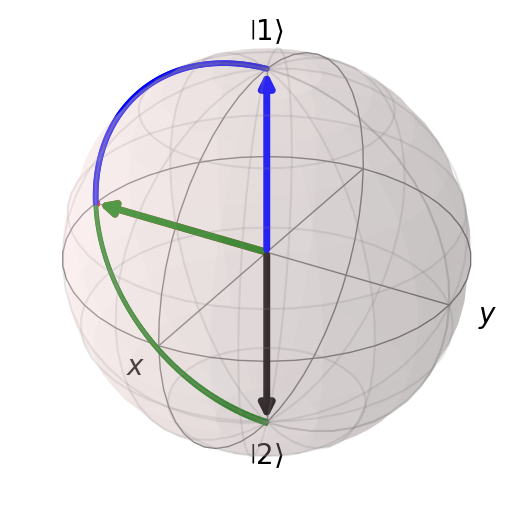

In [1]:
import numpy as np
from qutip import Bloch, basis, Qobj, sigmax, sigmay, sigmaz, expect

def rotation_matrix(theta):
    return np.array([[np.cos(theta/2), -1j*np.sin(theta/2)],
                     [-1j*np.sin(theta/2), np.cos(theta/2)]])

def free_evolution_matrix(theta):
    return np.array([[np.exp(-1j * theta /2), 0],
                     [0, np.exp(1j * theta /2)]])

def to_cartesian(state):
    x = expect(sigmax(), state)
    y = expect(sigmay(), state)
    z = expect(sigmaz(), state)
    
    r = np.sqrt(x**2 + y**2 + z**2)
    
    return np.array([x, y, z]) / r 

def calculate_path(initial_state, final_state, num_points=200):
    path_points = np.empty((3, num_points + 1))
    for i in range(num_points + 1):
        intermediate_state = (final_state * (i / num_points) + initial_state * (1 - i / num_points))
        path_points[:, i] = to_cartesian(intermediate_state)
    return path_points

bloch = Bloch()
psi0 = basis(2, 0)  # |0⟩

# Apply rotation
H_rot = Qobj(rotation_matrix(np.pi/2))
psi_pi_2 = H_rot * psi0

# Calculate state at each time step
times = np.linspace(0, 0, 100)
states = []
for t in times:
    U = Qobj(free_evolution_matrix(t))
    state_t = U * psi_pi_2
    states.append(state_t)
psi_pi_int = states[-1]

psi_final = H_rot * states[-1]

bloch.point_size = [10]
bloch.vector_width = 5
bloch.zlabel = [r"$\left|1\right>$",r"$\left|2\right>$"] 
path_points = calculate_path(psi0, psi_pi_2)
bloch.add_points(path_points)
path_points = calculate_path(psi_pi_2,psi_pi_int)
bloch.add_points(path_points, )
path_points = calculate_path(psi_pi_int,psi_final)
bloch.add_points(path_points)
bloch.vector_color = ['b',"r","g","black"] 
bloch.add_states(psi0, kind='vector')
bloch.add_states(psi_pi_2, kind='vector')
bloch.add_states(psi_pi_int, kind='vector')
bloch.add_states(psi_final, kind='vector')
bloch.save("bloch_sphere1.png")
bloch.show()


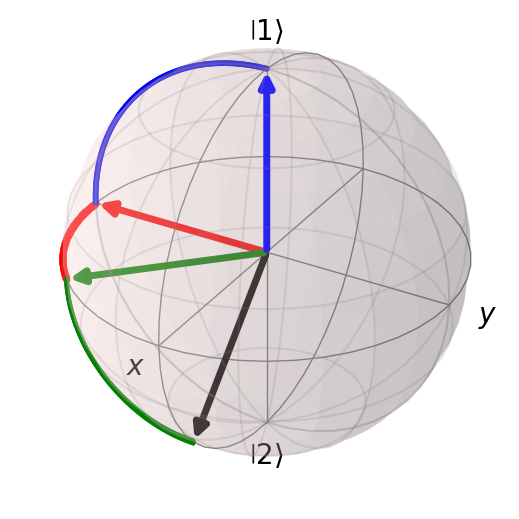

In [2]:
import numpy as np
from qutip import Bloch, basis, Qobj, sigmax, sigmay, sigmaz, expect

def rotation_matrix(theta):
    return np.array([[np.cos(theta/2), -1j*np.sin(theta/2)],
                     [-1j*np.sin(theta/2), np.cos(theta/2)]])

def free_evolution_matrix(theta):
    return np.array([[np.exp(-1j * theta /2), 0],
                     [0, np.exp(1j * theta /2)]])

# Convert state vector to Cartesian coordinates
def to_cartesian(state):
    x = expect(sigmax(), state)
    y = expect(sigmay(), state)
    z = expect(sigmaz(), state)
    
    r = np.sqrt(x**2 + y**2 + z**2)
    
    return np.array([x, y, z]) / r  # Normalize to lie on the unit sphere

# Calculate points along the evolution path
def calculate_path(initial_state, final_state, num_points=200):
    path_points = np.empty((3, num_points + 1))
    for i in range(num_points + 1):
        intermediate_state = (final_state * (i / num_points) + initial_state * (1 - i / num_points))
        path_points[:, i] = to_cartesian(intermediate_state)
    return path_points

# Plot Bloch sphere
bloch = Bloch()

# Define initial state
psi0 = basis(2, 0)  # |0⟩

# Apply rotation
H_rot = Qobj(rotation_matrix(np.pi/2))
psi_pi_2 = H_rot * psi0

times = np.linspace(0, np.pi/4, 100)
# Calculate state at each time step
states = []
for t in times:
    U = Qobj(free_evolution_matrix(t))
    state_t = U * psi_pi_2
    states.append(state_t)

psi_pi_int = states[-1]
# Apply another pi/2 pulse after free propagation
psi_final = H_rot * states[-1]

# Calculate and plot the evolution path
bloch.point_size = [10]
bloch.vector_width = 5
bloch.zlabel = [r"$\left|1\right>$",r"$\left|2\right>$"] 
path_points = calculate_path(psi0, psi_pi_2)
bloch.add_points(path_points)
path_points = calculate_path(psi_pi_2,psi_pi_int)
bloch.add_points(path_points, )
path_points = calculate_path(psi_pi_int,psi_final)
bloch.add_points(path_points)
bloch.vector_color = ['b',"r","g","black"] 
bloch.add_states(psi0, kind='vector')
bloch.add_states(psi_pi_2, kind='vector')
bloch.add_states(psi_pi_int, kind='vector')
bloch.add_states(psi_final, kind='vector')
bloch.save("bloch_sphere2.png")
bloch.show()


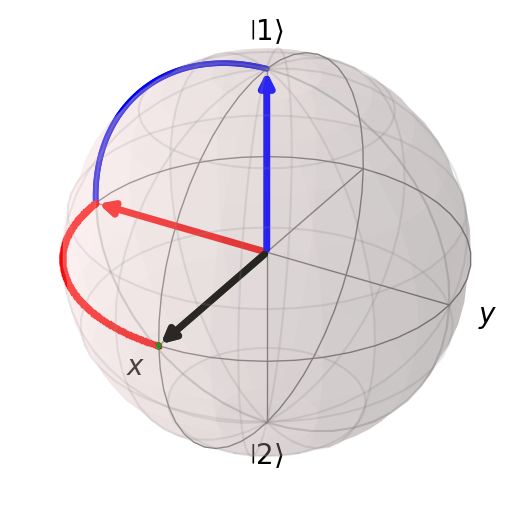

In [3]:
import numpy as np
from qutip import Bloch, basis, Qobj, sigmax, sigmay, sigmaz, expect

def rotation_matrix(theta):
    return np.array([[np.cos(theta/2), -1j*np.sin(theta/2)],
                     [-1j*np.sin(theta/2), np.cos(theta/2)]])

def free_evolution_matrix(theta):
    return np.array([[np.exp(-1j * theta /2), 0],
                     [0, np.exp(1j * theta /2)]])

# Convert state vector to Cartesian coordinates
def to_cartesian(state):
    x = expect(sigmax(), state)
    y = expect(sigmay(), state)
    z = expect(sigmaz(), state)
    
    r = np.sqrt(x**2 + y**2 + z**2)
    
    return np.array([x, y, z]) / r  # Normalize to lie on the unit sphere

# Calculate points along the evolution path
def calculate_path(initial_state, final_state, num_points=200):
    path_points = np.empty((3, num_points + 1))
    for i in range(num_points + 1):
        intermediate_state = (final_state * (i / num_points) + initial_state * (1 - i / num_points))
        path_points[:, i] = to_cartesian(intermediate_state)
    return path_points

# Plot Bloch sphere
bloch = Bloch()

# Define initial state
psi0 = basis(2, 0)  # |0⟩

# Apply rotation
H_rot = Qobj(rotation_matrix(np.pi/2))
psi_pi_2 = H_rot * psi0

times = np.linspace(0, np.pi/2, 100)
# Calculate state at each time step
states = []
for t in times:
    U = Qobj(free_evolution_matrix(t))
    state_t = U * psi_pi_2
    states.append(state_t)

psi_pi_int = states[-1]
# Apply another pi/2 pulse after free propagation
psi_final = H_rot * states[-1]

# Calculate and plot the evolution path
bloch.point_size = [10]
bloch.vector_width = 5
bloch.zlabel = [r"$\left|1\right>$",r"$\left|2\right>$"] 
path_points = calculate_path(psi0, psi_pi_2)
bloch.add_points(path_points)
path_points = calculate_path(psi_pi_2,psi_pi_int)
bloch.add_points(path_points, )
path_points = calculate_path(psi_pi_int,psi_final)
bloch.add_points(path_points)
bloch.vector_color = ['b',"r","g","black"] 
bloch.add_states(psi0, kind='vector')
bloch.add_states(psi_pi_2, kind='vector')
bloch.add_states(psi_pi_int, kind='vector')
bloch.add_states(psi_final, kind='vector')
bloch.save("bloch_sphere3.png")
bloch.show()


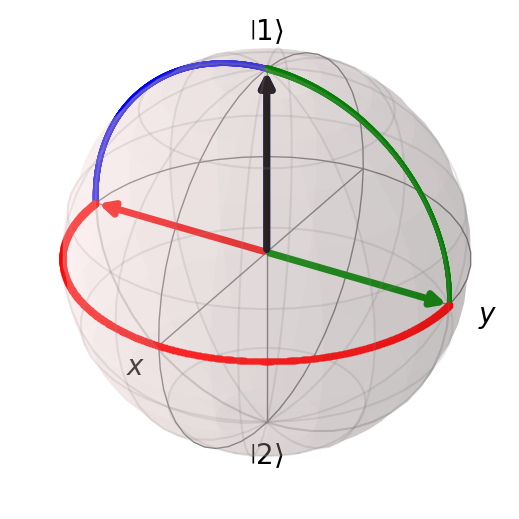

In [4]:
import numpy as np
from qutip import Bloch, basis, Qobj, sigmax, sigmay, sigmaz, expect

def rotation_matrix(theta):
    return np.array([[np.cos(theta/2), -1j*np.sin(theta/2)],
                     [-1j*np.sin(theta/2), np.cos(theta/2)]])

def free_evolution_matrix(theta):
    return np.array([[np.exp(-1j * theta /2), 0],
                     [0, np.exp(1j * theta /2)]])

# Convert state vector to Cartesian coordinates
def to_cartesian(state):
    x = expect(sigmax(), state)
    y = expect(sigmay(), state)
    z = expect(sigmaz(), state)
    
    r = np.sqrt(x**2 + y**2 + z**2)
    
    return np.array([x, y, z]) / r  # Normalize to lie on the unit sphere

# Calculate points along the evolution path
def calculate_path(initial_state, final_state, num_points=900):
    path_points = np.empty((3, num_points + 1))
    for i in range(num_points + 1):
        intermediate_state = (final_state * (i / num_points) + initial_state * (1 - i / num_points))
        path_points[:, i] = to_cartesian(intermediate_state)
    return path_points

# Plot Bloch sphere
bloch = Bloch()

# Define initial state
psi0 = basis(2, 0)  # |0⟩

# Apply rotation
H_rot = Qobj(rotation_matrix(np.pi/2))
psi_pi_2 = H_rot * psi0

times = np.linspace(0, np.pi, 100)
# Calculate state at each time step
states = []
for t in times:
    U = Qobj(free_evolution_matrix(t))
    state_t = U * psi_pi_2
    states.append(state_t)

psi_pi_int = states[-1]
# Apply another pi/2 pulse after free propagation
psi_final = H_rot * states[-1]

# Calculate and plot the evolution path
bloch.point_size = [10]
bloch.vector_width = 5
bloch.zlabel = [r"$\left|1\right>$",r"$\left|2\right>$"] 
path_points = calculate_path(psi0, psi_pi_2)
bloch.add_points(path_points)
path_points = calculate_path(psi_pi_2,psi_pi_int)
bloch.add_points(path_points, )
path_points = calculate_path(psi_pi_int,psi_final)
bloch.add_points(path_points)
bloch.vector_color = ['b',"r","g","black"] 
bloch.add_states(psi0, kind='vector')
bloch.add_states(psi_pi_2, kind='vector')
bloch.add_states(psi_pi_int, kind='vector')
bloch.add_states(psi_final, kind='vector')
bloch.save("bloch_sphere4.png")
bloch.show()
